# Sentiment Analysis: Twitter

# Group Members:

HINAL PATEL(CWID: 10473912)

KEERTHANA SHARMA VALLURU (CWID: 20007141)

PRANITHA VARSHINI SAMALA (10479218)

# EDA for Twitter Sentiment Analysis
Imports & Constants

In [1]:
import pandas as pd                    # for data frames        
import matplotlib.pyplot as plt        # Plotting graphs
%matplotlib inline                

In [2]:
DATA_FILE_NAME = 'twitter_training.csv'                 
CLEAN_DATA_FILE_NAME = 'clean_twitter_data.csv' #Make file to save clean data

# Read data File

In [3]:
#Read the data
df = pd.read_csv(DATA_FILE_NAME)
df

,Id,Entity,Sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


The Data-set contains 74681 rows and 4 columns, It is downloaded from Kaggle.

In [4]:
df.columns        

Index(['Id', 'Entity', 'Sentiment ', 'Tweets'], dtype='object')

In [5]:
df= df.rename(columns={'Sentiment ': 'Sentiment'})   #change name for column sentiment 

# What are the categorical values?

In [6]:
df.Entity.value_counts(dropna=False)    #categories the Organization 

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [7]:
df.Sentiment.value_counts() # Categories the sentiment 

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

# Check for missing data


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweets     73990 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


Id             0
Entity         0
Sentiment      0
Tweets       691
dtype: int64

We can see that only Tweets have missing data, So that we need to remove all those missing data rows.

In [10]:
print('Percentage of missing values per feature')
round(df.isna().sum() * 100 / len(df), 2)

Percentage of missing values per feature


Id           0.00
Entity       0.00
Sentiment    0.00
Tweets       0.93
dtype: float64

In [11]:
df_missing_target = df[df.Tweets.isna()]

In [12]:
df_missing_target

,Id,Entity,Sentiment,Tweets
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


In [13]:
df_missing_target.Sentiment.value_counts()

Neutral       210
Negative      189
Positive      177
Irrelevant    115
Name: Sentiment, dtype: int64

In [14]:
df_missing_target.Sentiment.value_counts(normalize=True)

Neutral       0.303907
Negative      0.273517
Positive      0.256151
Irrelevant    0.166425
Name: Sentiment, dtype: float64

# Clean Data

Delete the line with no tweet text
Delete the lines where emotion = "Irrelevant'

Some data will be lost because of this, but protecting the privacy of any individuals mentioned in the tweets is more important

In [15]:
df_clean = df.dropna(subset=['Tweets'])    # drop out row which contains the empty tweets

In [16]:
df_clean = df_clean[df_clean.Sentiment!= "Irrelevant"]   # drop out row for irrelevant emotion

In [17]:
df_clean.Sentiment.value_counts()  

Negative    22353
Positive    20654
Neutral     18108
Name: Sentiment, dtype: int64

In [18]:
# change all mentions to @mention (some were already switched but not all)
import re
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub("@[A-Za-z0-9]+", "@mention", x))

In [19]:
df_clean


,Id,Entity,Sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


After Removing the empty rows in original data, it contains 61115 rows and 4 columns

In [20]:
print('Number of missing values per feature')
df_clean.isna().sum()

Number of missing values per feature


Id           0
Entity       0
Sentiment    0
Tweets       0
dtype: int64

In [21]:
df_missing = df_clean[df_clean.Tweets.isna()]
df_missing

,Id,Entity,Sentiment,Tweets


From above output we can say that we  dont have missing data in our data frame.

# Save Cleaned Data File

In [22]:
# Save clean data to the CSV file 

df_clean.to_csv(CLEAN_DATA_FILE_NAME,index = False)

# Visualize Data
# Distribution of Classes

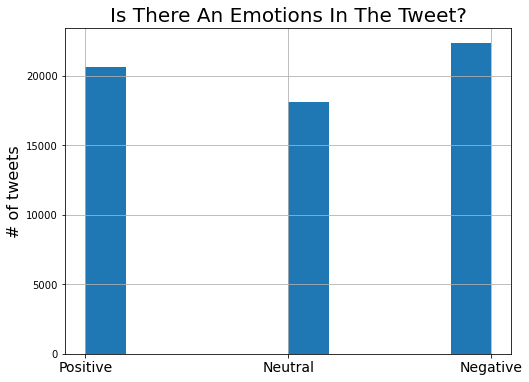

In [23]:
plt.figure(figsize=(8,6))
df_clean.Sentiment.hist(xlabelsize=14)
plt.title('Is There An Emotions In The Tweet?', fontsize=20)
plt.ylabel('# of tweets', fontsize=16)
plt.show()

From the above graph, Negative tweets comparatively higher than positive and neutral tweets

# Distribution of Target Products

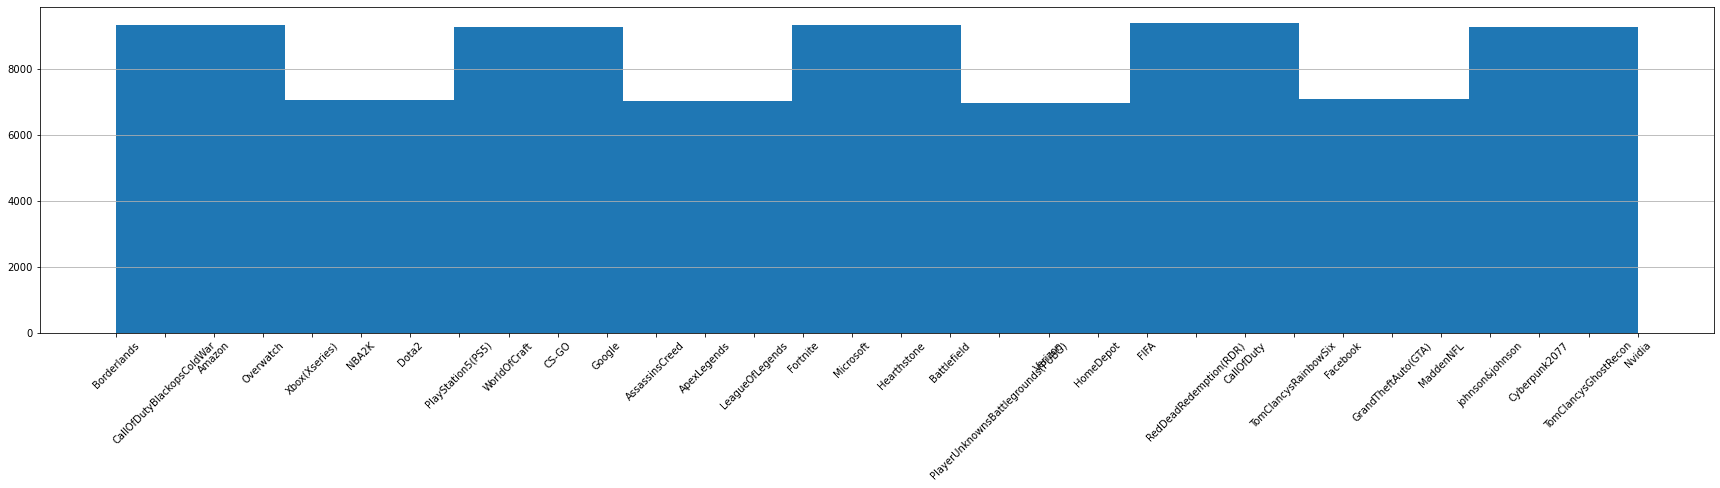

In [24]:
plt.figure(figsize=(30,6))
df.Entity.hist(bins=9)
plt.xticks(rotation=45)
plt.grid(b=False, axis='x')
plt.show()

# How long are the tweets?

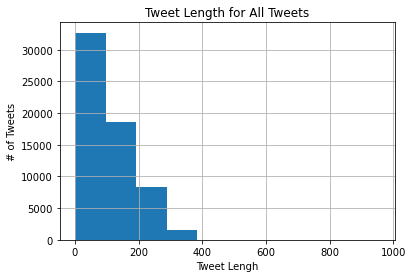

In [25]:
df_clean['tweet_len'] = df_clean.Tweets.apply(len)
df_clean.tweet_len.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()


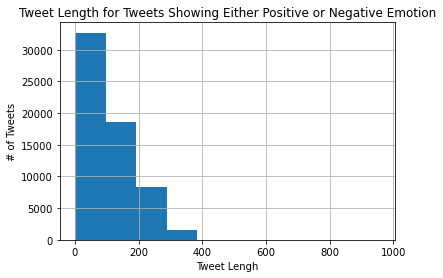

In [26]:
df_clean[df_clean.Sentiment != 'No emotion toward brand or product'].tweet_len.hist()
plt.title('Tweet Length for Tweets Showing Either Positive or Negative Emotion')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [27]:
df_clean.tweet_len.max()

957

In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
df_clean[df_clean.tweet_len > 300].head()


,Id,Entity,Sentiment,Tweets,tweet_len
93,2416,Borderlands,Neutral,I hate thinking that this easy mayhem modifier event on total mayhem won ’ t last forever. this is the absolutely most ridiculous fun experience i ’ ve had in the game almost since... they added them horrible modifiers. @mention please do give me the option option to a play mayhem 10 but turn the modifiers off PLS,315
123,2421,Borderlands,Positive,"Finally played through borderlands 3. The actual game I play is great. Almost all guns feel fun, and yet I never once felt much like someone I seriously needed to grind. That pretty story on the other side hand.... All I will say Is that I'm very damn much so forward looking forward to the eventual endless cutscene skip : )",325
301,2451,Borderlands,Positive,"""Psycho and Ostik Fusterkluck"" is the perfect conclusion to the ""Borderlands 3"" line, which focuses on the fans ""favorite character and gives the players the opportunity to close for a long time some very important questions about's character and the memorable scenery with which the players interact.",301
303,2451,Borderlands,Positive,I seriously disagree. The Psycho Krieg and the Very Fantastic Fustercluck story is a wonderful end to the borderlands 3 dlc book line that focuses on a fan favorite character and gives long game lasting players closure on some very big questions of both Krieg ’ s character and the memorable set in pieces players always interact with.,335
333,2456,Borderlands,Neutral,"Lee Hey borderlands mutuals fam, sorry I've not been interacting as directly and or playing games as fun much as I had really been but I really love ya'll too so much. Thank you for reminding me fandom game isn't just a giant time cesspool. I Thank you for having such cute little characters to look much forward to seeing and - -",330


In [30]:
df_clean[df_clean.tweet_len == 957]

,Id,Entity,Sentiment,Tweets,tweet_len
70939,10952,TomClancysGhostRecon,Neutral,"The event dedicated to Victory Day in the Great Patriotic War was held as part of the celebration of the 70th anniversary of Victory in the Great Patriotic War of 1941-1945, which was attended by veterans of the Great Patriotic War, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home",957


# Text Preprocessing for Twitter Sentiment Analysis
Imports and Constants

In [31]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string

In [32]:
CLEAN_DATA_FILE_NAME = 'clean_twitter_data.csv'            
TOKENIZED_DATA_FILE_NAME = 'tokenized_twitter_data.csv'    # to save the pre-processed data

In [33]:
df = pd.read_csv(CLEAN_DATA_FILE_NAME)      # Read Clean data file 

In [34]:
pd.set_option('display.max_colwidth', None)
df.head()

,Id,Entity,Sentiment,Tweets
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"


# Clean Tweet Text Data

Change all text to lowercase

Remove urls

Remove mentions

Remove placeholders {link} and [video]

Remove punctuation that isn't associated with emojis

In [35]:
# lower case
df_clean.Tweets = df_clean.Tweets.str.lower()

In [36]:
# remove url links
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
# remove url/website that didn't use http, is only checking for .com websites 
# so words that are seperated by a . are not removed
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
# remove @mention
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub(r'@mention', '', x))
# remove {link}
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub(r'{link}', '', x))
# remove &text; html chars
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
# [video]
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub(r"\[video\]", '', x))
# remove all remaining characters that aren't letters, white space, or 
# the following #:)(/\='] that are used in emojis or hashtags
df_clean.Tweets = df_clean.Tweets.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))


In [37]:
df_clean.iloc[90:100]

,Id,Entity,Sentiment,Tweets,tweet_len
91,2416,Borderlands,Neutral,i hate that this easy mayhem modifier event on mayhem won't last forever this is the most fun i've had in the game since they added them horrible modifiers borderlands please give me the option to play mayhem but turn the modifiers off pls,246
92,2416,Borderlands,Neutral,i hate saying this easy day event on mayhem wont last forever this is the most fun ive had in the game since they added them horrible modifiers please give me some ability to play mayhem but turn the modifiers off pls,235
93,2416,Borderlands,Neutral,i hate thinking that this easy mayhem modifier event on total mayhem won t last forever this is the absolutely most ridiculous fun experience i ve had in the game almost since they added them horrible modifiers please do give me the option option to a play mayhem but turn the modifiers off pls,315
94,2416,Borderlands,Neutral,i hate that this easy horrible modifier event on game last forever that is the best fun ive taken in the past until they added them horrible modifiers please send me the option to play mayhem but turn the modifiers for pls,240
95,2417,Borderlands,Negative,grounded almost looked pretty cool even despite the borderlands tier unfunny writing until it became yet another survival crafting game i really cant wait for this shitty trend to die,185
96,2417,Borderlands,Negative,grounded looked cool despite the borderline unfunny writing until it became another survival crafting game i really can't wait for this crappy trend to die,158
97,2417,Borderlands,Negative,grosskreutz looked pretty cool even despite the unfunny spelling until it turned into another survival game i really can't wait for this crap trend to die,157
98,2417,Borderlands,Negative,grounded almost looked pretty cool here despite the borderlands tier unfunny writing until it became yet an survival crafting game i really cant wait for this shitty mod to die,178
99,2417,Borderlands,Negative,deep grounded almost looked pretty cool even despite the borderlands fifth tier unfunny writing format until ultimately it became yet another survival crafting mobile game i really can t wait for this shitty trend starting to die,235
100,2417,Borderlands,Negative,grounded almost was pretty cool even despite the top tier unfunny writing until we became yet another annoying crafting game i seriously cant wait on this shitty trend to die,176


# Tokenize tweet_text

In [38]:
tknzr = TweetTokenizer()
df_clean['tokens'] = df_clean['Tweets'].apply(tknzr.tokenize)
df_clean.iloc[40:50][['Tweets', 'tokens']]

,Tweets,tokens
40,unk gearbox really time to fix this drops in the new borderlands dlc or be fine to force bosses on mayhem to get a legendary drop while everyone else i get - drops really needs alot,"[unk, gearbox, really, time, to, fix, this, drops, in, the, new, borderlands, dlc, or, be, fine, to, force, bosses, on, mayhem, to, get, a, legendary, drop, while, everyone, else, i, get, -, drops, really, needs, alot]"
41,check out this epic streamer,"[check, out, this, epic, streamer]"
42,check out this epic streamer,"[check, out, this, epic, streamer]"
43,watch this epic striptease,"[watch, this, epic, striptease]"
44,check out our epic streamer,"[check, out, our, epic, streamer]"
45,check out this big epic streamer,"[check, out, this, big, epic, streamer]"
46,checkunk this epic streamer,"[checkunk, this, epic, streamer]"
47,blaming sight for tardiness a little bit of borderlands i got called in early for work tomorrow so i can't make up time sorry my loves twitchtv/punnisenpai,"[blaming, sight, for, tardiness, a, little, bit, of, borderlands, i, got, called, in, early, for, work, tomorrow, so, i, can't, make, up, time, sorry, my, loves, twitchtv, /, punnisenpai]"
48,a bit of borderland i was called to work tomorrow morning so i can't catch up sorry my love twitchtv / punnisenpai,"[a, bit, of, borderland, i, was, called, to, work, tomorrow, morning, so, i, can't, catch, up, sorry, my, love, twitchtv, /, punnisenpai]"
49,guilty of sobriety a bit of a borderline i was called to work early tomorrow so i can't catch up,"[guilty, of, sobriety, a, bit, of, a, borderline, i, was, called, to, work, early, tomorrow, so, i, can't, catch, up]"


# Remove Punctuation From Tokens

The tweet tokenizer combined characters that make common emoticons, but all the other punctuation needs to be removed




In [39]:
PUNCUATION_LIST = list(string.punctuation)

In [40]:
def remove_punctuation(word_list):
    """Remove punctuation tokens from a list of tokens"""
    return [w for w in word_list if w not in PUNCUATION_LIST]

In [41]:
df_clean['tokens'] = df_clean['tokens'].apply(remove_punctuation)

# Create Corpus

In [42]:
corpus_tokens = df_clean['tokens'].sum()

# Check Frequency Distribution

In [43]:
corpus_freq_dist = FreqDist(corpus_tokens)

In [44]:
len(corpus_freq_dist)

29060

How many words appear only once?

In [45]:
only_one_instance = [w for w in corpus_freq_dist.most_common() if w[1] == 1]

In [46]:
len(only_one_instance)

8444

About half the words in the corpus appear only once.

How many words appear at least 5 times?

In [47]:
at_least_five = [w for w in corpus_freq_dist.most_common() if w[1] >= 5]

In [48]:
len(at_least_five)

14013

In [49]:
at_least_five[:50]

[('the', 36459),
 ('i', 24815),
 ('to', 23921),
 ('and', 21914),
 ('a', 19429),
 ('of', 15798),
 ('is', 14673),
 ('for', 12644),
 ('in', 12594),
 ('this', 11997),
 ('it', 11642),
 ('my', 9942),
 ('on', 9839),
 ('you', 9449),
 ('that', 8353),
 ('game', 7351),
 ('with', 7272),
 ('so', 6523),
 ('me', 5619),
 ('have', 5551),
 ('just', 5536),
 ('but', 5247),
 ('not', 5224),
 ('be', 4913),
 ('are', 4849),
 ('all', 4513),
 ('was', 4452),
 ('at', 4322),
 ('like', 3894),
 ('out', 3620),
 ('from', 3585),
 ('your', 3566),
 ('now', 3512),
 ('get', 3452),
 ('pic', 3332),
 ('as', 3126),
 ('we', 3088),
 ('play', 3064),
 ('they', 2966),
 ('can', 2949),
 ('one', 2923),
 ('do', 2912),
 ('good', 2889),
 ('if', 2888),
 ('johnson', 2853),
 ('new', 2840),
 ('about', 2834),
 ('no', 2818),
 ('an', 2758),
 ('has', 2733)]

This group accounts for around a quarter of the corpus and includes numerous stop words that would normally be eliminated from text; nevertheless, since a tweet is limited to 300 characters, each word that a person uses has potential worth for sentiment analysis. According to one research, eliminating stop words from tweets while undertaking sentiment analysis decreases categorization efficiency.

# Save Cleaned and Tokenized Data

In [50]:
df_clean.to_csv(TOKENIZED_DATA_FILE_NAME, index=False)

# Machine Learning Models for Twitter Sentiment Analysis

# Model 1: Naive Bayes Classifier

The model will use Multinomial Naive Bayes with Vector Count (bag of words) to classify the tweets.

In [51]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
import ast

In [52]:
TOKENIZED_DATA_FILE_NAME = 'tokenized_twitter_data.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

In [53]:
df = pd.read_csv(TOKENIZED_DATA_FILE_NAME)
df.head()

,Id,Entity,Sentiment,Tweets,tweet_len,tokens
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you all,51,"['i', 'am', 'coming', 'to', 'the', 'borders', 'and', 'i', 'will', 'kill', 'you', 'all']"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,50,"['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all']"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you all,51,"['im', 'coming', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all']"
3,2401,Borderlands,Positive,im getting on borderlands and i will murder you me all,57,"['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'me', 'all']"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder you all,53,"['im', 'getting', 'into', 'borderlands', 'and', 'i', 'can', 'murder', 'you', 'all']"


In [54]:
# convert list of strings represented as a string to a list of strings
df.tokens = df.tokens.map(ast.literal_eval)

In [55]:
data = df[['tokens', 'Sentiment']]
data.head()

,tokens,Sentiment
0,"[i, am, coming, to, the, borders, and, i, will, kill, you, all]",Positive
1,"[im, getting, on, borderlands, and, i, will, kill, you, all]",Positive
2,"[im, coming, on, borderlands, and, i, will, murder, you, all]",Positive
3,"[im, getting, on, borderlands, and, i, will, murder, you, me, all]",Positive
4,"[im, getting, into, borderlands, and, i, can, murder, you, all]",Positive


# Split the Data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['Sentiment'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['Sentiment'])

In [57]:
X_train.shape

(48892,)

In [58]:
X_test.shape

(12223,)

# Encode Labels

In [59]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Define Pipeline

In [60]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc

In [61]:
pipeline = Pipeline([
    ('bow',CountVectorizer(preprocessor=passthrough, tokenizer=passthrough)), 
    ('classifier', MultinomialNB()), 
])

# ML Model

In [62]:
pipeline.fit(X_train,y_train_enc)

Pipeline(steps=[('bow',
                 CountVectorizer(preprocessor=<function passthrough at 0x7f7a7d025dc0>,
                                 tokenizer=<function passthrough at 0x7f7a7d025dc0>)),
                ('classifier', MultinomialNB())])

# Evaluate Model

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.80      0.89      0.84     17883
     Neutral       0.90      0.71      0.79     14486
    Positive       0.81      0.86      0.84     16523

    accuracy                           0.83     48892
   macro avg       0.84      0.82      0.82     48892
weighted avg       0.83      0.83      0.83     48892



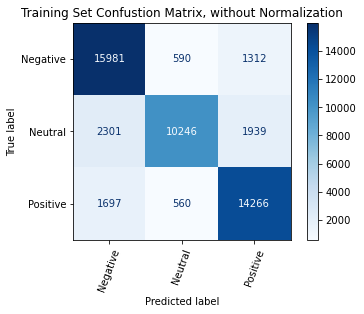

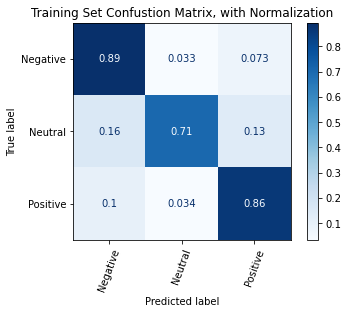

In [63]:
evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')

Classification Report for Testing Set
              precision    recall  f1-score   support

    Negative       0.76      0.87      0.81      4470
     Neutral       0.86      0.64      0.73      3622
    Positive       0.78      0.83      0.80      4131

    accuracy                           0.79     12223
   macro avg       0.80      0.78      0.78     12223
weighted avg       0.79      0.79      0.78     12223



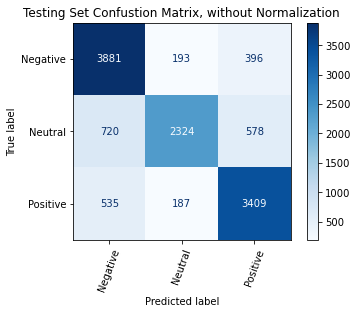

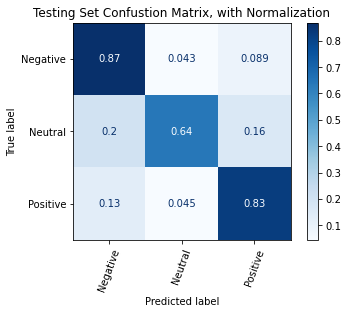

In [64]:
evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Testing')

In [65]:
lb = LabelBinarizer()
lb.fit(y_test_enc)
y_test_multi = lb.transform(y_test_enc)
y_hat_test_multi = pipeline.predict_proba(X_test)

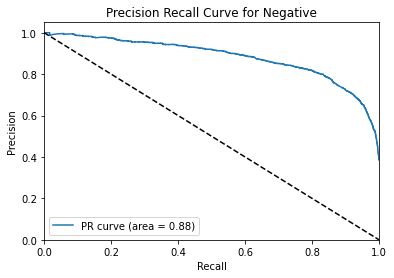

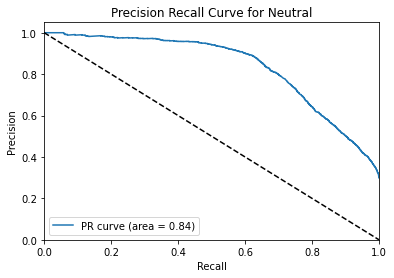

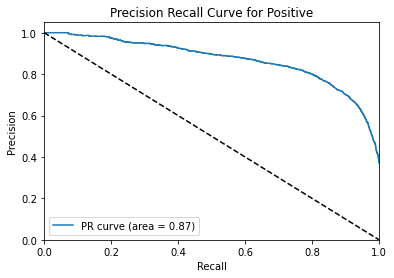

In [66]:
evaluation_functions.pr_curves(y_test_multi, y_hat_test_multi, le.classes_)

Summary:

The accuracy for the model is 79% on the test set while being a significantly higher 83% on the training set.


The Negative Emotion class in the test data has an Recall of 0.87, Positive has 0.83 and Neutral has 0.64

The Macro Average Recall is 0.76



# Model 2: SVM Model


This model will use SVM with tf/idf to classify the tweets.

It will reduce the dimensionality of the feature set by adjusting the minimum document frequency of words, in an attempt to get better results.

In [67]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
import ast

In [68]:
TOKENIZED_DATA_FILE_NAME = 'tokenized_twitter_data.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42


In [69]:
df = pd.read_csv(TOKENIZED_DATA_FILE_NAME)

In [70]:
df.head()

,Id,Entity,Sentiment,Tweets,tweet_len,tokens
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you all,51,"['i', 'am', 'coming', 'to', 'the', 'borders', 'and', 'i', 'will', 'kill', 'you', 'all']"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,50,"['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all']"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you all,51,"['im', 'coming', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all']"
3,2401,Borderlands,Positive,im getting on borderlands and i will murder you me all,57,"['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'me', 'all']"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder you all,53,"['im', 'getting', 'into', 'borderlands', 'and', 'i', 'can', 'murder', 'you', 'all']"


In [71]:
# convert list of strings represented as a string to a list of strings
df.tokens = df.tokens.map(ast.literal_eval)
data = df[['tokens', 'Sentiment']]
data.head()

,tokens,Sentiment
0,"[i, am, coming, to, the, borders, and, i, will, kill, you, all]",Positive
1,"[im, getting, on, borderlands, and, i, will, kill, you, all]",Positive
2,"[im, coming, on, borderlands, and, i, will, murder, you, all]",Positive
3,"[im, getting, on, borderlands, and, i, will, murder, you, me, all]",Positive
4,"[im, getting, into, borderlands, and, i, can, murder, you, all]",Positive


In [72]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['Sentiment'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['Sentiment'])

In [73]:
X_train.shape

(48892,)

In [74]:
X_test.shape

(12223,)

In [75]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Evaluate Adjustments to Minimum Document Frequency

In [76]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc


In [77]:
def train_and_eval_model(min_df):
    """
    Train and Evaluate and Bag of Words Representation with a SVM
    classifier with a specified minimum document frequency.
    """
    
    pipeline = Pipeline([
    ('bow',CountVectorizer(min_df=min_df,
                           preprocessor=passthrough, 
                           tokenizer=passthrough)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier(loss='hinge', 
                                 penalty='l2',
                                 alpha=1e-3, 
                                 random_state=RANDOM_STATE,
                                 max_iter=5, 
                                 tol=None)),
    ])
    
    pipeline.fit(X_train,y_train_enc)
    
    print(f'MINIMUM DOCUMENT FREQUENCY = {min_df}')
    print('')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')
    
    train_accuracy = accuracy_score(y_train_enc, pipeline.predict(X_train))
    
    test_accuracy = accuracy_score(y_test_enc, pipeline.predict(X_test))
    
    ave_macro_recall = recall_score(y_test_enc, pipeline.predict(X_test), average='macro')
    recall_scores = recall_score(y_test_enc, pipeline.predict(X_test), average=None)
    
    test_results = np.append(np.array([min_df, train_accuracy, test_accuracy, ave_macro_recall]),
                             recall_scores)
   
    return test_results
    


MINIMUM DOCUMENT FREQUENCY = 1

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.67      0.86      0.75     17883
     Neutral       0.80      0.49      0.60     14486
    Positive       0.72      0.75      0.74     16523

    accuracy                           0.71     48892
   macro avg       0.73      0.70      0.70     48892
weighted avg       0.73      0.71      0.70     48892



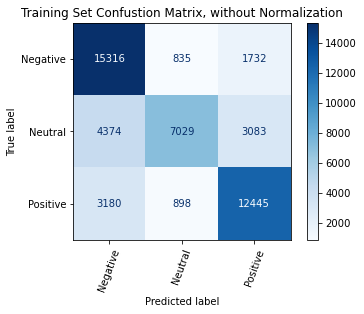

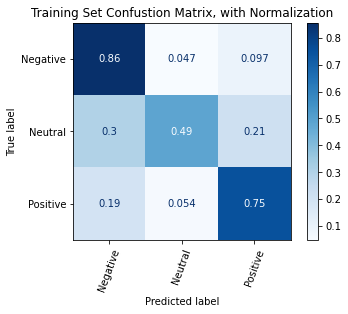

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.66      0.84      0.74      4470
     Neutral       0.78      0.47      0.58      3622
    Positive       0.71      0.75      0.73      4131

    accuracy                           0.70     12223
   macro avg       0.72      0.68      0.68     12223
weighted avg       0.71      0.70      0.69     12223



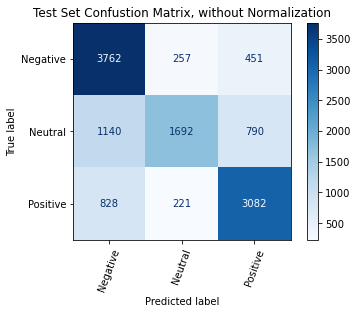

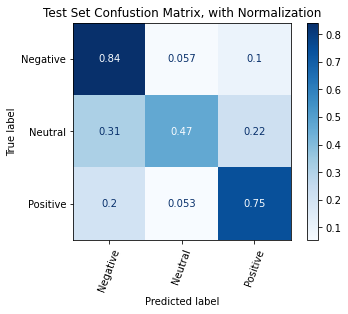

MINIMUM DOCUMENT FREQUENCY = 2

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.67      0.86      0.75     17883
     Neutral       0.80      0.49      0.60     14486
    Positive       0.72      0.75      0.74     16523

    accuracy                           0.71     48892
   macro avg       0.73      0.70      0.70     48892
weighted avg       0.72      0.71      0.70     48892



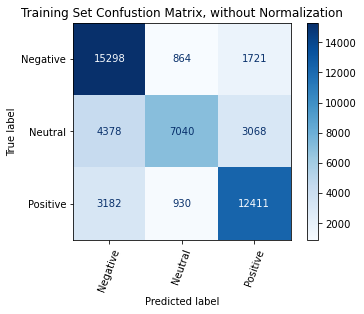

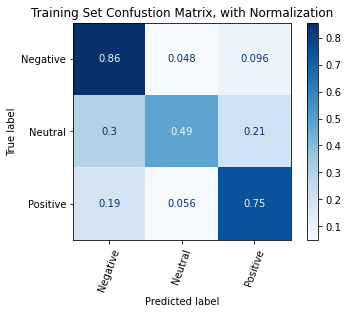

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.66      0.84      0.74      4470
     Neutral       0.78      0.47      0.59      3622
    Positive       0.72      0.75      0.73      4131

    accuracy                           0.70     12223
   macro avg       0.72      0.69      0.68     12223
weighted avg       0.71      0.70      0.69     12223



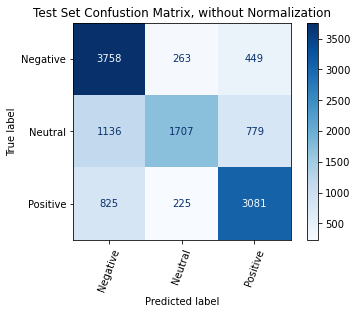

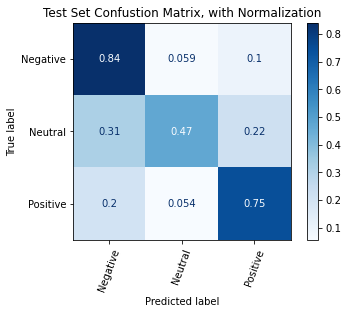

MINIMUM DOCUMENT FREQUENCY = 3

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.66      0.86      0.75     17883
     Neutral       0.81      0.48      0.60     14486
    Positive       0.72      0.75      0.73     16523

    accuracy                           0.71     48892
   macro avg       0.73      0.70      0.70     48892
weighted avg       0.73      0.71      0.70     48892



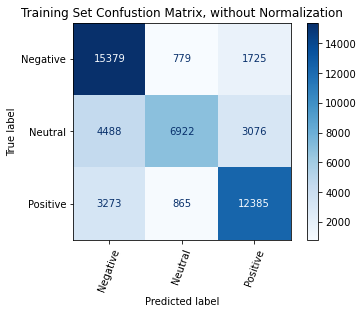

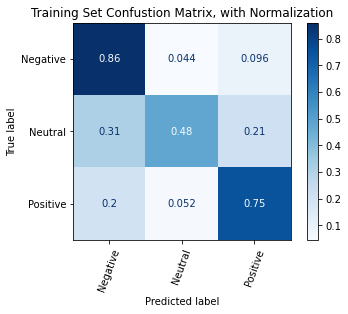

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.65      0.85      0.74      4470
     Neutral       0.79      0.46      0.58      3622
    Positive       0.71      0.74      0.73      4131

    accuracy                           0.70     12223
   macro avg       0.72      0.68      0.68     12223
weighted avg       0.71      0.70      0.69     12223



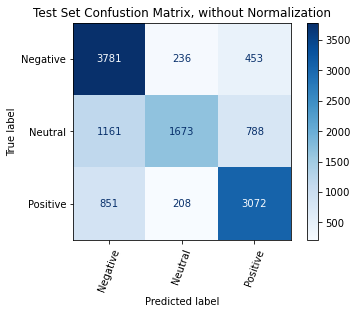

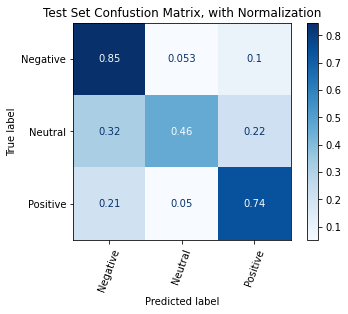

MINIMUM DOCUMENT FREQUENCY = 4

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.66      0.86      0.75     17883
     Neutral       0.80      0.47      0.60     14486
    Positive       0.72      0.75      0.73     16523

    accuracy                           0.71     48892
   macro avg       0.73      0.69      0.69     48892
weighted avg       0.72      0.71      0.70     48892



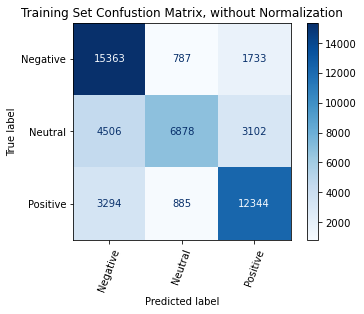

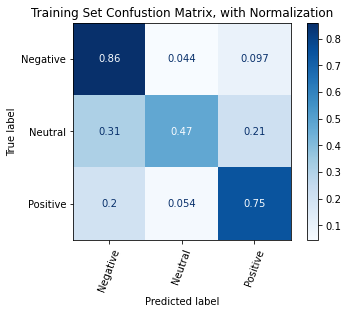

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.65      0.84      0.74      4470
     Neutral       0.78      0.46      0.58      3622
    Positive       0.71      0.74      0.72      4131

    accuracy                           0.70     12223
   macro avg       0.72      0.68      0.68     12223
weighted avg       0.71      0.70      0.69     12223



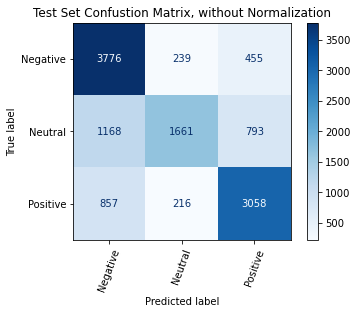

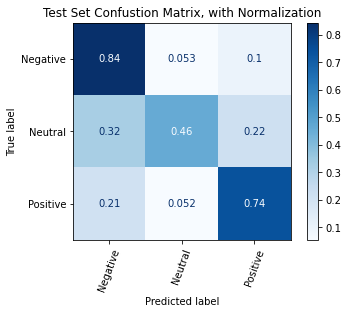

MINIMUM DOCUMENT FREQUENCY = 5

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.66      0.86      0.75     17883
     Neutral       0.79      0.47      0.59     14486
    Positive       0.72      0.74      0.73     16523

    accuracy                           0.70     48892
   macro avg       0.72      0.69      0.69     48892
weighted avg       0.72      0.70      0.69     48892



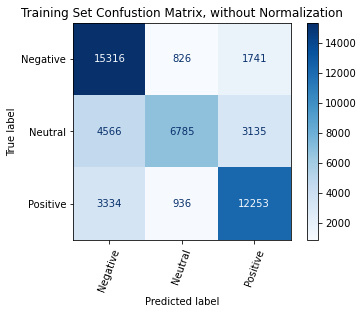

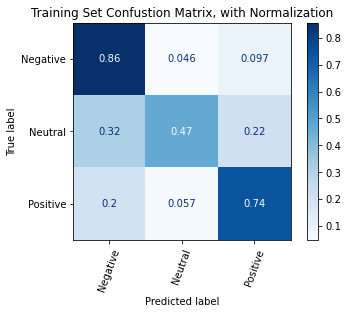

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.65      0.84      0.73      4470
     Neutral       0.78      0.45      0.57      3622
    Positive       0.71      0.73      0.72      4131

    accuracy                           0.69     12223
   macro avg       0.71      0.68      0.68     12223
weighted avg       0.71      0.69      0.68     12223



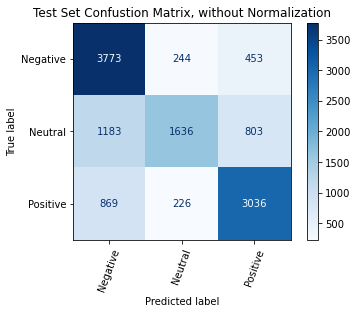

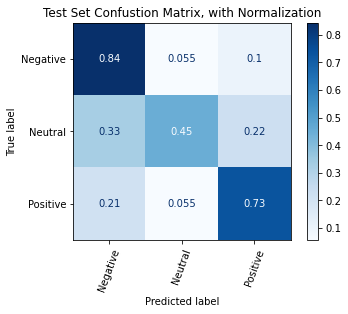

MINIMUM DOCUMENT FREQUENCY = 6

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.66      0.85      0.74     17883
     Neutral       0.79      0.46      0.58     14486
    Positive       0.71      0.74      0.72     16523

    accuracy                           0.70     48892
   macro avg       0.72      0.68      0.68     48892
weighted avg       0.71      0.70      0.69     48892



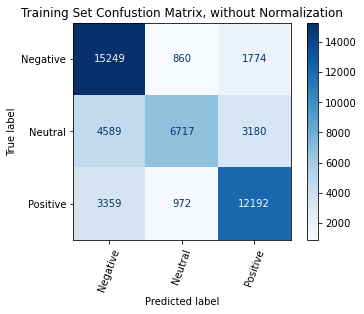

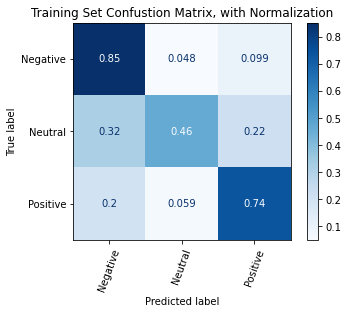

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.65      0.84      0.73      4470
     Neutral       0.77      0.45      0.57      3622
    Positive       0.71      0.73      0.72      4131

    accuracy                           0.69     12223
   macro avg       0.71      0.68      0.67     12223
weighted avg       0.70      0.69      0.68     12223



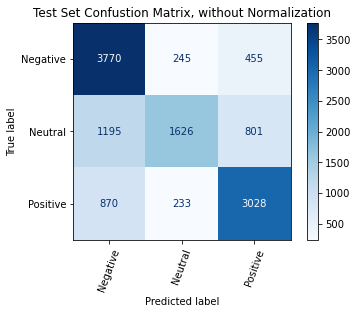

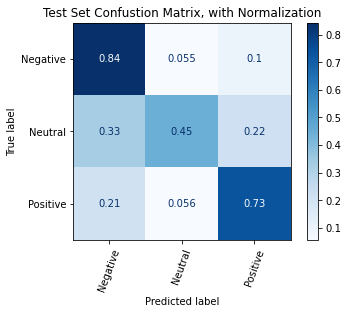

MINIMUM DOCUMENT FREQUENCY = 7

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.65      0.85      0.74     17883
     Neutral       0.78      0.46      0.58     14486
    Positive       0.71      0.73      0.72     16523

    accuracy                           0.70     48892
   macro avg       0.71      0.68      0.68     48892
weighted avg       0.71      0.70      0.69     48892



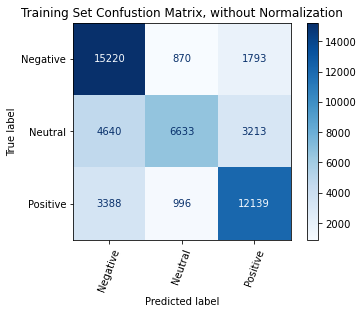

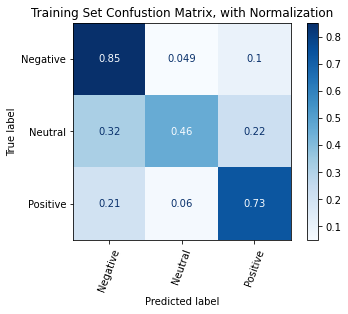

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.64      0.84      0.73      4470
     Neutral       0.77      0.44      0.56      3622
    Positive       0.70      0.73      0.72      4131

    accuracy                           0.69     12223
   macro avg       0.71      0.67      0.67     12223
weighted avg       0.70      0.69      0.68     12223



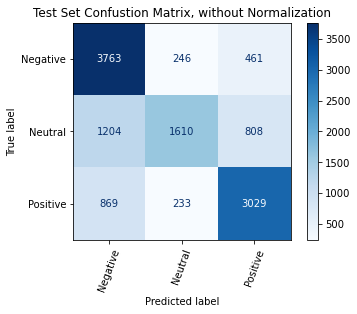

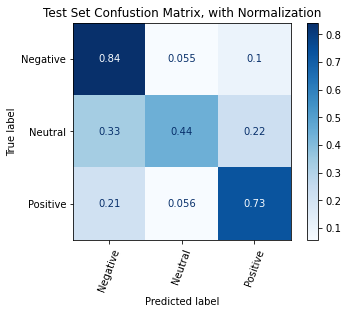

MINIMUM DOCUMENT FREQUENCY = 8

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.65      0.85      0.74     17883
     Neutral       0.78      0.46      0.58     14486
    Positive       0.71      0.73      0.72     16523

    accuracy                           0.69     48892
   macro avg       0.71      0.68      0.68     48892
weighted avg       0.71      0.69      0.68     48892



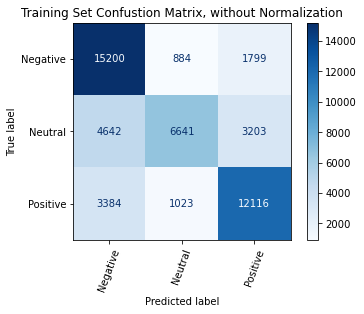

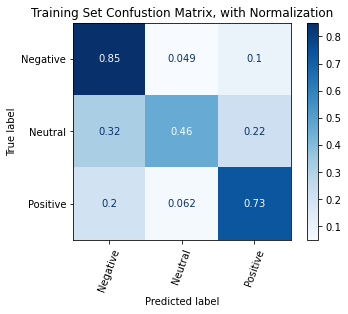

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.64      0.84      0.73      4470
     Neutral       0.77      0.44      0.56      3622
    Positive       0.70      0.73      0.72      4131

    accuracy                           0.69     12223
   macro avg       0.70      0.67      0.67     12223
weighted avg       0.70      0.69      0.68     12223



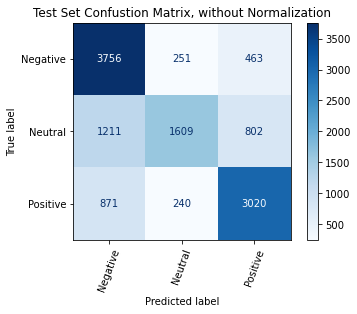

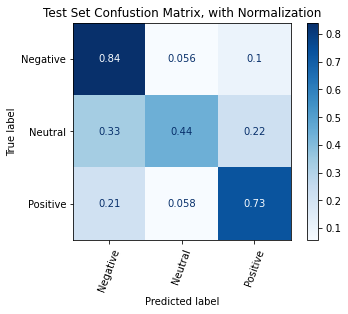

MINIMUM DOCUMENT FREQUENCY = 9

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.65      0.85      0.74     17883
     Neutral       0.77      0.46      0.57     14486
    Positive       0.71      0.73      0.72     16523

    accuracy                           0.69     48892
   macro avg       0.71      0.68      0.68     48892
weighted avg       0.71      0.69      0.68     48892



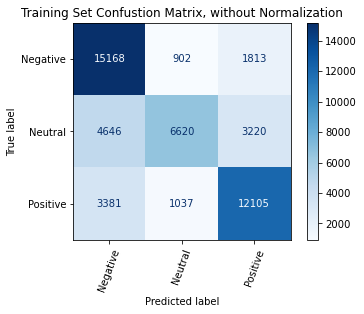

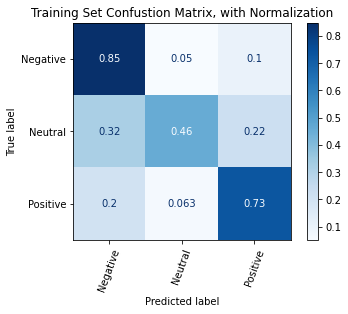

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.64      0.84      0.73      4470
     Neutral       0.77      0.44      0.56      3622
    Positive       0.70      0.73      0.72      4131

    accuracy                           0.69     12223
   macro avg       0.70      0.67      0.67     12223
weighted avg       0.70      0.69      0.68     12223



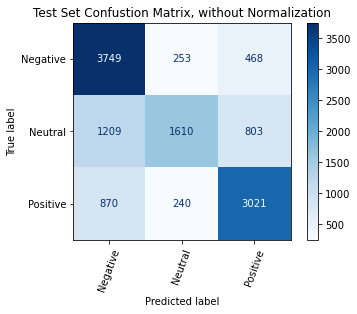

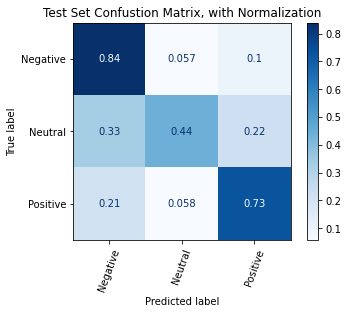

In [78]:
metrics_summary = []

for min_df in range(1,10):
    test_scores = train_and_eval_model(min_df)
    metrics_summary.append(test_scores)

In [79]:
metrics_summary_df = pd.DataFrame(metrics_summary, 
                                  columns=['min doc freq',
                                           'train accuracy',
                                           'test accuracy',
                                           'macro recall',
                                          'neg recall',
                                          'neutral recall',
                                          'pos recall'])

metrics_summary_df

,min doc freq,train accuracy,test accuracy,macro recall,neg recall,neutral recall,pos recall
0,1.0,0.711568,0.698356,0.684941,0.841611,0.467145,0.746066
1,2.0,0.710730,0.699174,0.685942,0.840716,0.471287,0.745824
2,3.0,0.709441,0.697537,0.683802,0.845861,0.461900,0.743646
3,4.0,0.707375,0.695001,0.681195,0.844743,0.458586,0.740257
4,5.0,0.702651,0.690911,0.676896,0.844072,0.451684,0.734931
5,6.0,0.698642,0.689193,0.675106,0.843400,0.448923,0.732994
6,7.0,0.695247,0.687393,0.673192,0.841834,0.444506,0.733237
7,8.0,0.694531,0.686002,0.671852,0.840268,0.444230,0.731058
8,9.0,0.693222,0.685593,0.671503,0.838702,0.444506,0.731300


# Model 3: Naive Bayes Model

This model will use Multinomial Naive Bayes with tf/idf to classify the tweets.

It will reduce the dimensionality of the feature set by adjusting the minimum document frequency of words, in an attempt to get better results.

Lemmatization will be applied to the dataset.

With SMOTE oversampling

In [80]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
from sklearn.feature_extraction.text import TfidfTransformer 
from imblearn.over_sampling import SMOTE
import ast

In [82]:
TOKENIZED_DATA_FILE_NAME = 'tokenized_twitter_data.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

In [83]:
df = pd.read_csv(TOKENIZED_DATA_FILE_NAME)

In [84]:
df.head()

,Id,Entity,Sentiment,Tweets,tweet_len,tokens
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you all,51,"['i', 'am', 'coming', 'to', 'the', 'borders', 'and', 'i', 'will', 'kill', 'you', 'all']"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all,50,"['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all']"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you all,51,"['im', 'coming', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all']"
3,2401,Borderlands,Positive,im getting on borderlands and i will murder you me all,57,"['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'me', 'all']"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder you all,53,"['im', 'getting', 'into', 'borderlands', 'and', 'i', 'can', 'murder', 'you', 'all']"


In [85]:
df.tokens = df.tokens.map(ast.literal_eval)

In [86]:
data = df[['tokens', 'Sentiment']]

In [87]:
data.head()

,tokens,Sentiment
0,"[i, am, coming, to, the, borders, and, i, will, kill, you, all]",Positive
1,"[im, getting, on, borderlands, and, i, will, kill, you, all]",Positive
2,"[im, coming, on, borderlands, and, i, will, murder, you, all]",Positive
3,"[im, getting, on, borderlands, and, i, will, murder, you, me, all]",Positive
4,"[im, getting, into, borderlands, and, i, can, murder, you, all]",Positive


In [88]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['Sentiment'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['Sentiment'])

In [89]:
X_train.shape


(48892,)

In [90]:
X_test.shape

(12223,)

In [91]:
le = LabelEncoder()

In [92]:
y_train_enc = le.fit_transform(y_train)

In [93]:
y_test_enc = le.transform(y_test)

# Evaluate Adjustments to Minimum Document Frequency

In [94]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
    def __init__(self):
         self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in doc]

In [95]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc

In [96]:
def train_and_eval_model(min_df):
    """
    Train and Evaluate and Bag of Words Representation with a Naive Bayes
    classifier with a specified minimum document frequency.
    """
    
    pipeline = Pipeline([
                        ('bow',CountVectorizer(min_df=min_df,
                                               preprocessor=passthrough,
                                               tokenizer=LemmaTokenizer(), 
                                               lowercase=False)),  
                        ('tfidf', TfidfTransformer()),
                        ('smote', SMOTE(random_state=RANDOM_STATE, n_jobs=-1)),
                        ('classifier', MultinomialNB())])
    
    pipeline.fit(X_train,y_train_enc)
    
    print(f'MINIMUM DOCUMENT FREQUENCY = {min_df}')
    print('')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')
    
    lb = LabelBinarizer()
    lb.fit(y_test_enc)
    y_test_multi = lb.transform(y_test_enc)
    y_hat_test_multi = pipeline.predict_proba(X_test)
    
    evaluation_functions.pr_curves(y_test_multi, y_hat_test_multi, le.classes_)
    
    train_accuracy = accuracy_score(y_train_enc, pipeline.predict(X_train))
    
    test_accuracy = accuracy_score(y_test_enc, pipeline.predict(X_test))
        
    macro_ave_recall = recall_score(y_test_enc, pipeline.predict(X_test), average='macro')
    recall_scores = recall_score(y_test_enc, pipeline.predict(X_test), average=None)
    
    test_results = np.append(np.array([min_df, 
                                       train_accuracy, 
                                       test_accuracy, 
                                       train_accuracy - test_accuracy,
                                       macro_ave_recall]),
                             recall_scores)
   
    return test_results

In [97]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hinalpatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

MINIMUM DOCUMENT FREQUENCY = 1

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.81      0.90      0.85     17883
     Neutral       0.89      0.72      0.80     14486
    Positive       0.83      0.86      0.84     16523

    accuracy                           0.83     48892
   macro avg       0.84      0.83      0.83     48892
weighted avg       0.84      0.83      0.83     48892



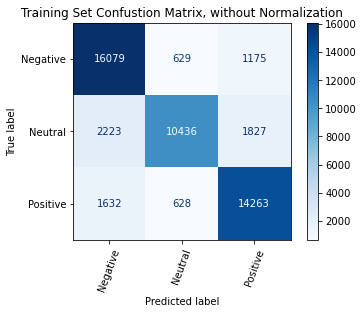

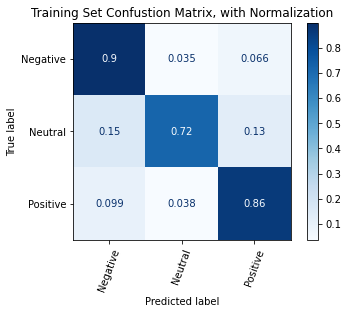

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.76      0.87      0.81      4470
     Neutral       0.85      0.66      0.74      3622
    Positive       0.79      0.82      0.80      4131

    accuracy                           0.79     12223
   macro avg       0.80      0.78      0.79     12223
weighted avg       0.80      0.79      0.79     12223



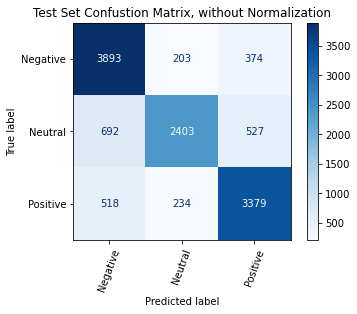

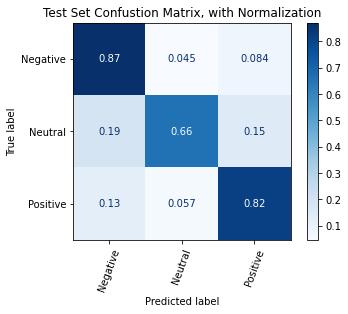

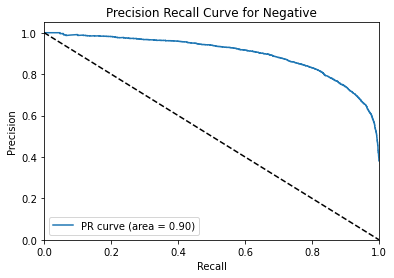

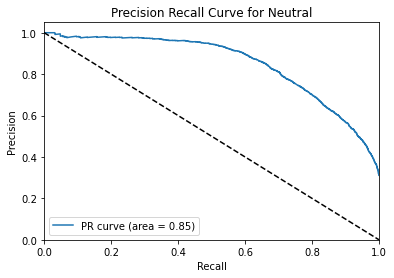

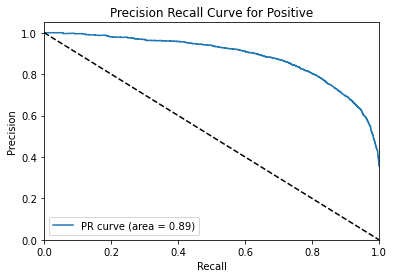

MINIMUM DOCUMENT FREQUENCY = 2

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.81      0.89      0.85     17883
     Neutral       0.88      0.72      0.79     14486
    Positive       0.82      0.86      0.84     16523

    accuracy                           0.83     48892
   macro avg       0.84      0.82      0.83     48892
weighted avg       0.83      0.83      0.83     48892



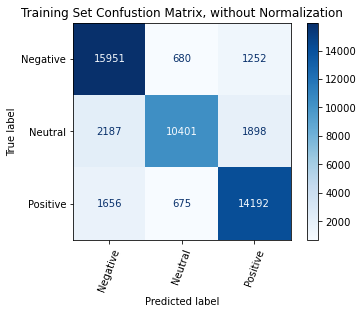

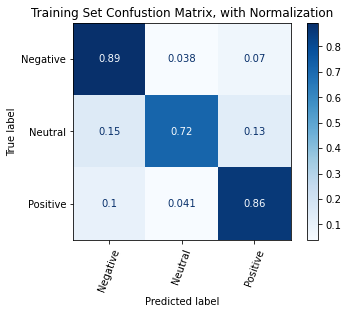

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.77      0.86      0.81      4470
     Neutral       0.84      0.67      0.74      3622
    Positive       0.78      0.82      0.80      4131

    accuracy                           0.79     12223
   macro avg       0.80      0.78      0.79     12223
weighted avg       0.79      0.79      0.79     12223



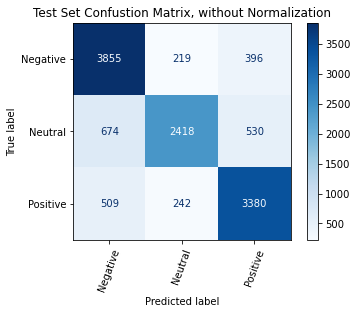

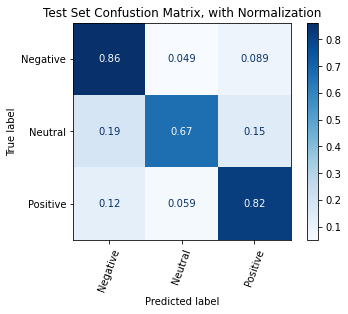

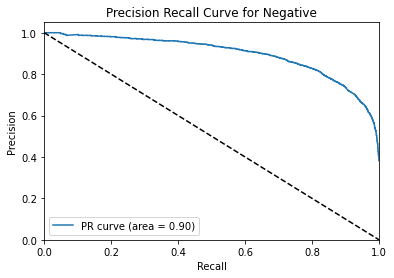

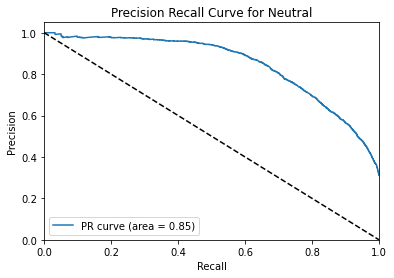

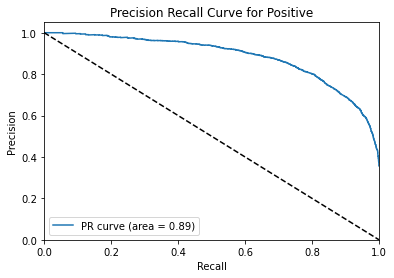

MINIMUM DOCUMENT FREQUENCY = 3

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84     17883
     Neutral       0.88      0.72      0.79     14486
    Positive       0.81      0.86      0.83     16523

    accuracy                           0.82     48892
   macro avg       0.83      0.82      0.82     48892
weighted avg       0.83      0.82      0.82     48892



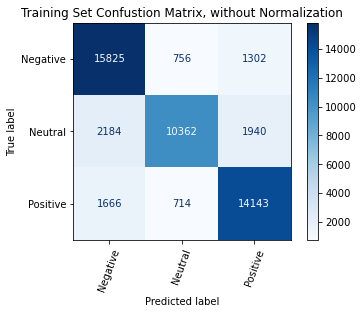

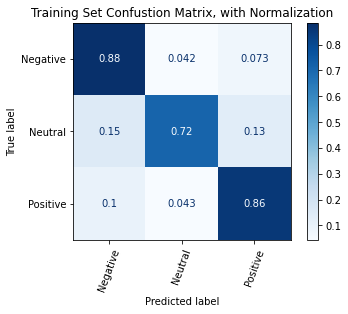

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.76      0.86      0.81      4470
     Neutral       0.83      0.66      0.73      3622
    Positive       0.78      0.81      0.79      4131

    accuracy                           0.78     12223
   macro avg       0.79      0.78      0.78     12223
weighted avg       0.79      0.78      0.78     12223



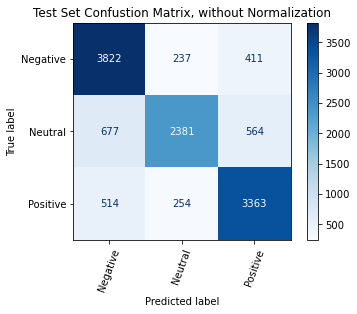

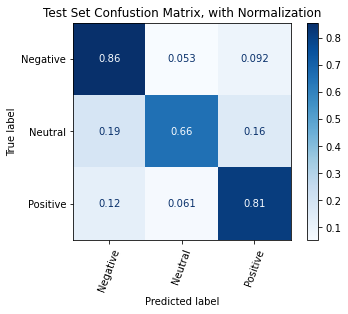

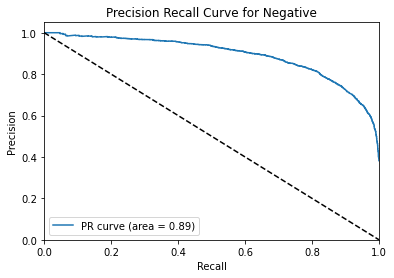

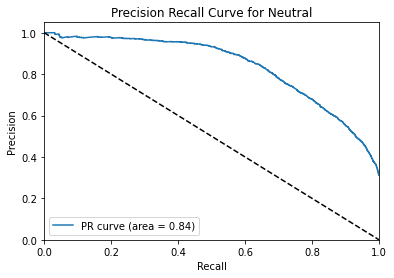

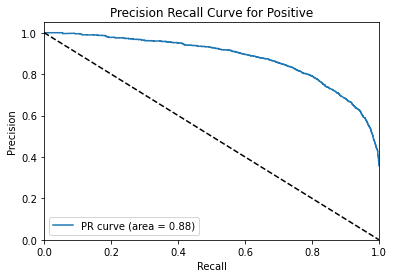

MINIMUM DOCUMENT FREQUENCY = 4

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.80      0.87      0.84     17883
     Neutral       0.86      0.71      0.78     14486
    Positive       0.80      0.85      0.82     16523

    accuracy                           0.82     48892
   macro avg       0.82      0.81      0.81     48892
weighted avg       0.82      0.82      0.81     48892



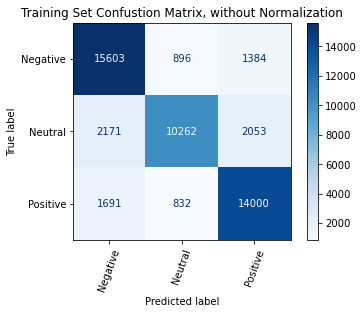

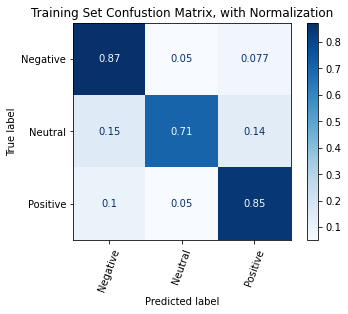

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.75      0.84      0.79      4470
     Neutral       0.80      0.64      0.71      3622
    Positive       0.76      0.80      0.78      4131

    accuracy                           0.77     12223
   macro avg       0.77      0.76      0.76     12223
weighted avg       0.77      0.77      0.76     12223



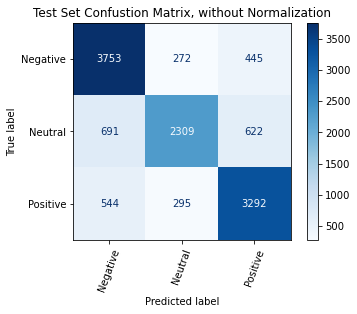

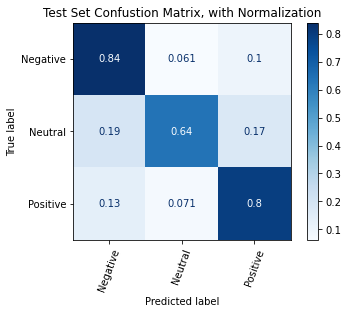

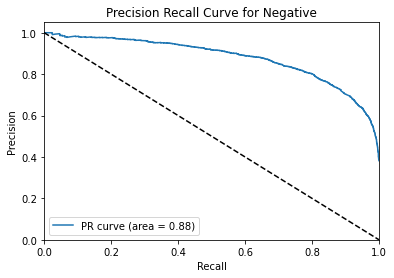

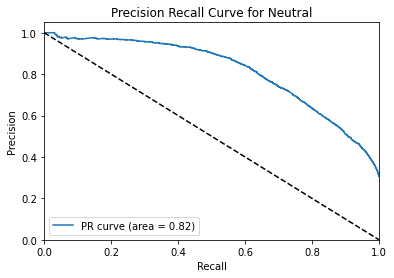

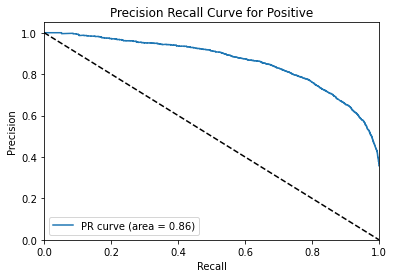

MINIMUM DOCUMENT FREQUENCY = 5

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.79      0.86      0.82     17883
     Neutral       0.83      0.68      0.75     14486
    Positive       0.78      0.83      0.81     16523

    accuracy                           0.80     48892
   macro avg       0.80      0.79      0.79     48892
weighted avg       0.80      0.80      0.79     48892



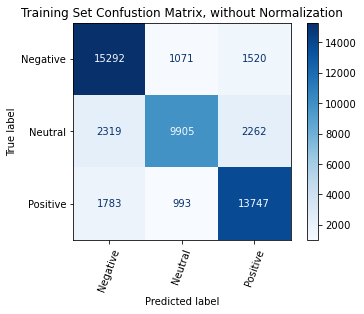

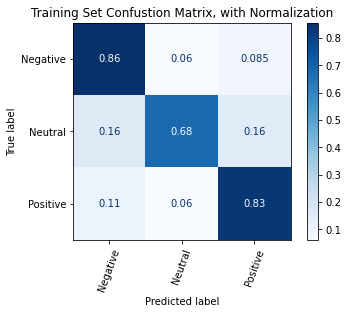

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.74      0.82      0.78      4470
     Neutral       0.77      0.62      0.69      3622
    Positive       0.74      0.78      0.76      4131

    accuracy                           0.75     12223
   macro avg       0.75      0.74      0.74     12223
weighted avg       0.75      0.75      0.75     12223



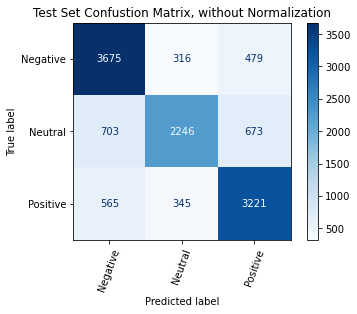

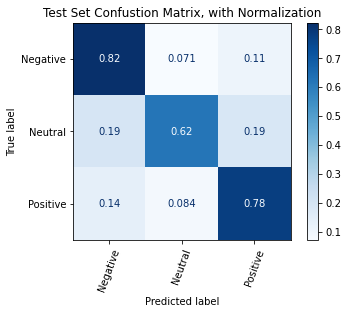

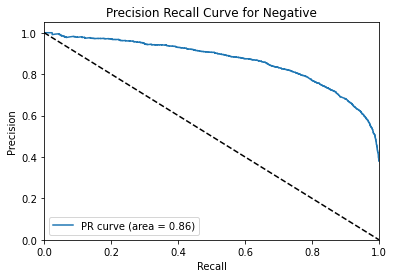

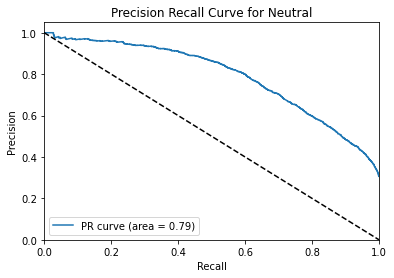

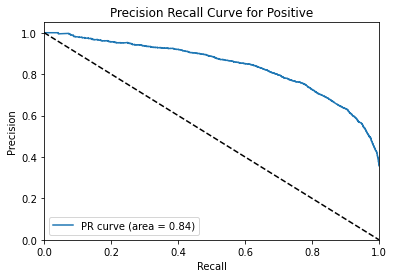

MINIMUM DOCUMENT FREQUENCY = 6

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.78      0.84      0.81     17883
     Neutral       0.79      0.67      0.72     14486
    Positive       0.77      0.81      0.79     16523

    accuracy                           0.78     48892
   macro avg       0.78      0.77      0.77     48892
weighted avg       0.78      0.78      0.78     48892



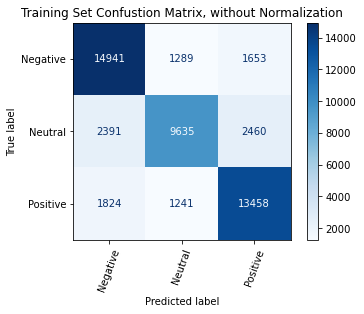

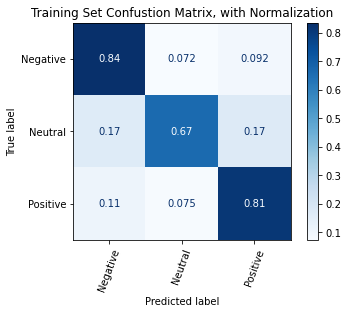

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.74      0.81      0.77      4470
     Neutral       0.74      0.62      0.68      3622
    Positive       0.73      0.77      0.75      4131

    accuracy                           0.74     12223
   macro avg       0.74      0.73      0.73     12223
weighted avg       0.74      0.74      0.74     12223



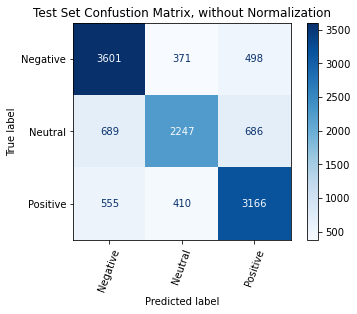

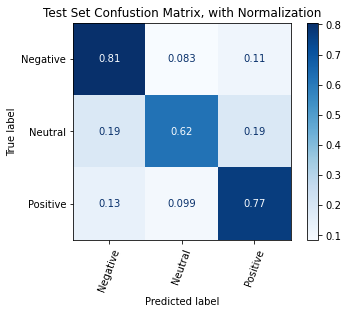

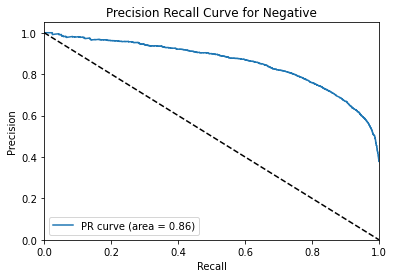

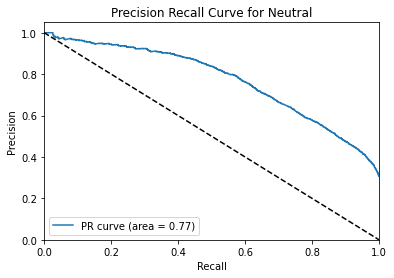

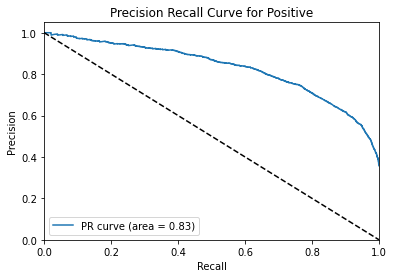

MINIMUM DOCUMENT FREQUENCY = 7

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.77      0.82      0.80     17883
     Neutral       0.77      0.66      0.71     14486
    Positive       0.76      0.80      0.78     16523

    accuracy                           0.77     48892
   macro avg       0.77      0.76      0.76     48892
weighted avg       0.77      0.77      0.76     48892



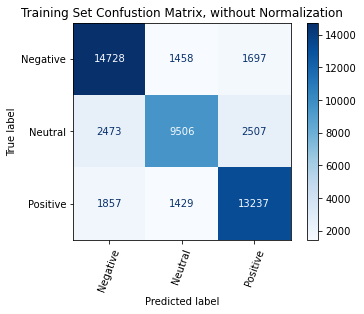

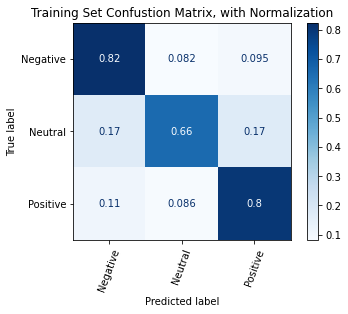

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.74      0.80      0.77      4470
     Neutral       0.73      0.62      0.67      3622
    Positive       0.73      0.76      0.74      4131

    accuracy                           0.73     12223
   macro avg       0.73      0.73      0.73     12223
weighted avg       0.73      0.73      0.73     12223



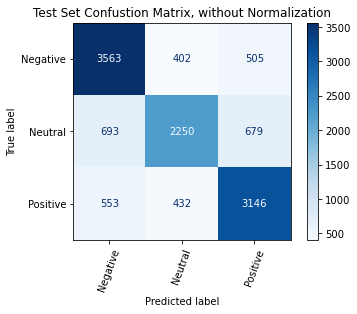

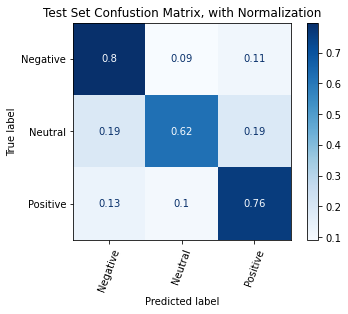

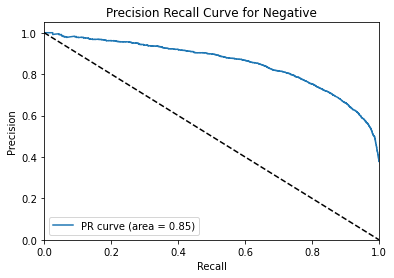

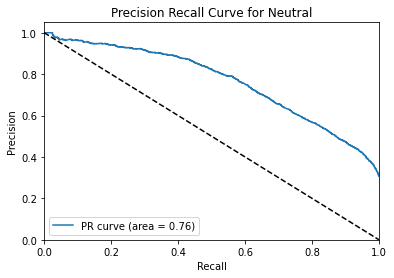

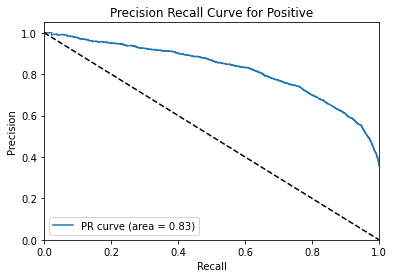

MINIMUM DOCUMENT FREQUENCY = 8

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.77      0.82      0.79     17883
     Neutral       0.76      0.65      0.70     14486
    Positive       0.75      0.80      0.77     16523

    accuracy                           0.76     48892
   macro avg       0.76      0.76      0.76     48892
weighted avg       0.76      0.76      0.76     48892



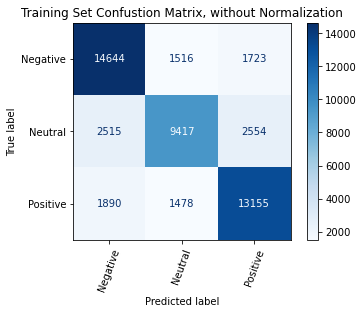

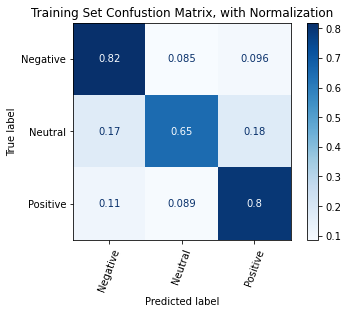

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.74      0.79      0.76      4470
     Neutral       0.72      0.62      0.67      3622
    Positive       0.72      0.76      0.74      4131

    accuracy                           0.73     12223
   macro avg       0.73      0.72      0.72     12223
weighted avg       0.73      0.73      0.73     12223



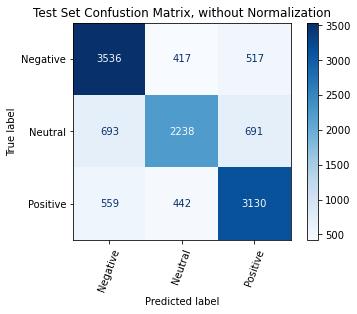

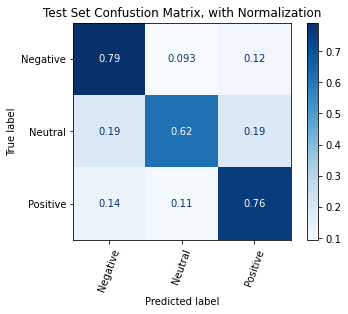

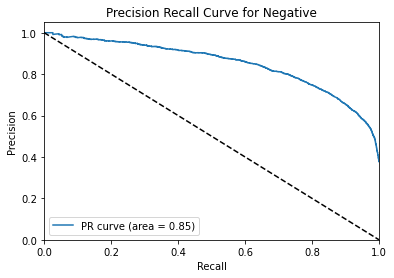

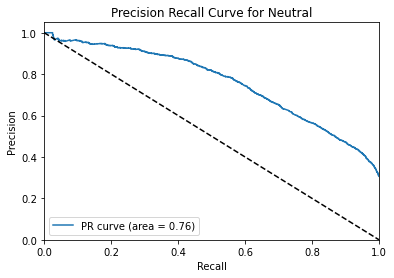

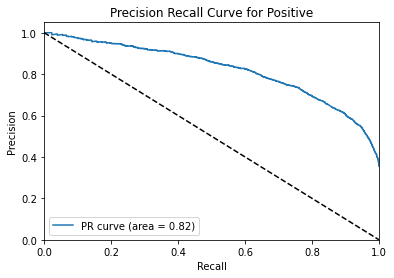

MINIMUM DOCUMENT FREQUENCY = 9

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.77      0.81      0.79     17883
     Neutral       0.75      0.65      0.70     14486
    Positive       0.75      0.79      0.77     16523

    accuracy                           0.76     48892
   macro avg       0.76      0.75      0.75     48892
weighted avg       0.76      0.76      0.75     48892



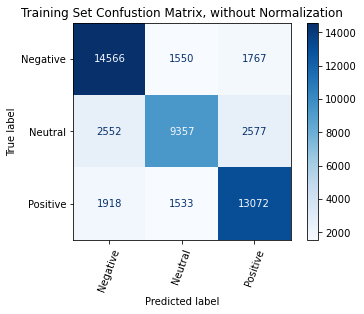

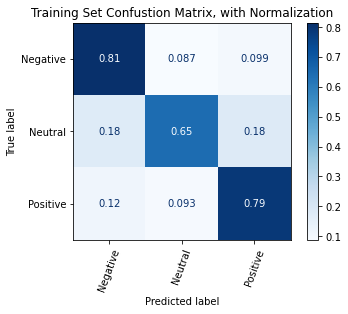

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.74      0.79      0.76      4470
     Neutral       0.72      0.61      0.66      3622
    Positive       0.72      0.76      0.74      4131

    accuracy                           0.73     12223
   macro avg       0.72      0.72      0.72     12223
weighted avg       0.72      0.73      0.72     12223



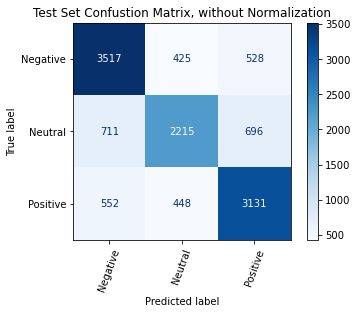

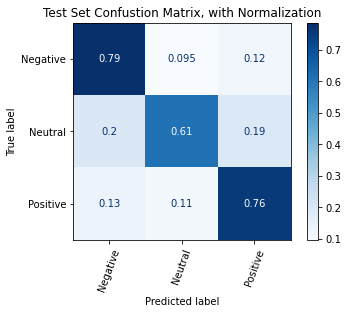

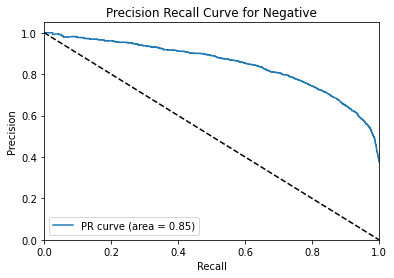

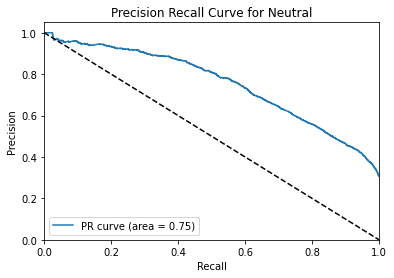

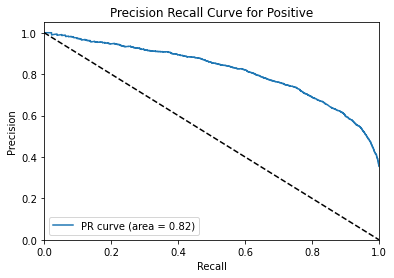

In [98]:
metrics_summary = []

for min_df in range(1,10):
    test_scores = train_and_eval_model(min_df)
    metrics_summary.append(test_scores)

In [99]:
metrics_summary_df = pd.DataFrame(metrics_summary, 
                                  columns=['min doc freq',
                                           'train accuracy',
                                           'test accuracy',
                                           'train-test acc diff',
                                           'macro recall',
                                          'neg recall',
                                          'neutral recall',
                                          'pos recall'])

metrics_summary_df


,min doc freq,train accuracy,test accuracy,train-test acc diff,macro recall,neg recall,neutral recall,pos recall
0,1.0,0.834042,0.791541,0.042502,0.784108,0.870917,0.663446,0.817962
1,2.0,0.829256,0.789741,0.039516,0.782736,0.862416,0.667587,0.818204
2,3.0,0.824879,0.782623,0.042256,0.775498,0.855034,0.657372,0.814089
3,4.0,0.815369,0.765279,0.050090,0.757997,0.839597,0.637493,0.796901
4,5.0,0.796531,0.747934,0.048597,0.740654,0.822148,0.620099,0.779714
5,6.0,0.777919,0.737462,0.040457,0.730790,0.805593,0.620375,0.766400
6,7.0,0.766404,0.732962,0.033441,0.726618,0.797092,0.621204,0.761559
7,8.0,0.761188,0.728463,0.032725,0.722209,0.791051,0.617891,0.757686
8,9.0,0.756668,0.725108,0.031559,0.718756,0.786801,0.611541,0.757928


# Model 4: SVM with Smote Model 

This model will use SVM with tf/idf to classify the tweets.

It will reduce the dimensionality of the feature set by adjusting the minimum document frequency of words, in an attempt to get better results.

It will use SMOTE to synthesize some data to balance the classes.

It will use Lemmatization to reduce dimensionality



In [100]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import ast

# Evaluate Adjustments to Minimum Document Frequency

In [101]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
    def __init__(self):
         self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in doc]


In [102]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc

In [103]:
def train_and_eval_model(min_df):
    """
    Train and Evaluate and Bag of Words Representation with a SVM
    classifier with a specified minimum document frequency.
    """
    
    pipeline = Pipeline([('bow',CountVectorizer(min_df=min_df, 
                                                preprocessor=passthrough, 
                                                tokenizer=LemmaTokenizer())),
                         ('tfidf', TfidfTransformer()),
                         ('smote', SMOTE(random_state=RANDOM_STATE, 
                                         n_jobs=-1)),
                         ('classifier', SGDClassifier(loss='hinge', 
                                                      penalty='l2',
                                                      alpha=1e-3, 
                                                      random_state=RANDOM_STATE,
                                                      max_iter=5, 
                                                      tol=None))])
    
    pipeline.fit(X_train,y_train_enc)
    
    print(f'MINIMUM DOCUMENT FREQUENCY = {min_df}')
    print('')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')
    
    train_accuracy = accuracy_score(y_train_enc, pipeline.predict(X_train))
    
    test_accuracy = accuracy_score(y_test_enc, pipeline.predict(X_test))
        
    recall_scores = recall_score(y_test_enc, pipeline.predict(X_test), average=None)
    
    test_results = np.append(np.array([min_df, train_accuracy, test_accuracy]),
                             recall_scores)
   
    return test_results

MINIMUM DOCUMENT FREQUENCY = 1

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75     17883
     Neutral       0.70      0.61      0.65     14486
    Positive       0.73      0.73      0.73     16523

    accuracy                           0.72     48892
   macro avg       0.72      0.71      0.71     48892
weighted avg       0.72      0.72      0.72     48892



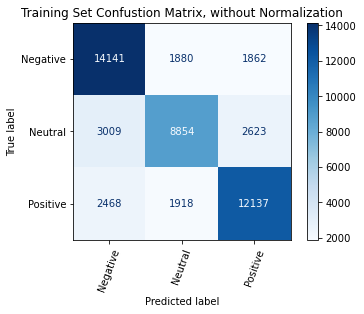

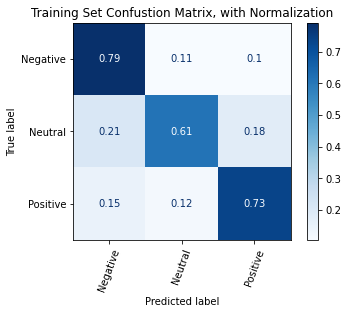

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.71      0.77      0.74      4470
     Neutral       0.68      0.59      0.63      3622
    Positive       0.71      0.72      0.72      4131

    accuracy                           0.70     12223
   macro avg       0.70      0.70      0.70     12223
weighted avg       0.70      0.70      0.70     12223



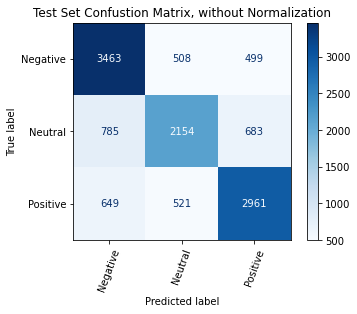

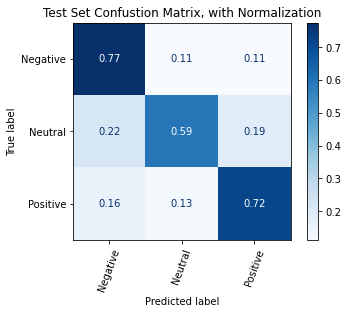

MINIMUM DOCUMENT FREQUENCY = 2

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75     17883
     Neutral       0.70      0.61      0.65     14486
    Positive       0.73      0.73      0.73     16523

    accuracy                           0.72     48892
   macro avg       0.72      0.71      0.71     48892
weighted avg       0.72      0.72      0.72     48892



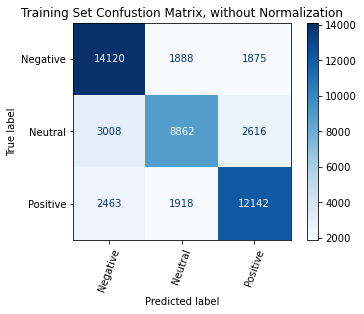

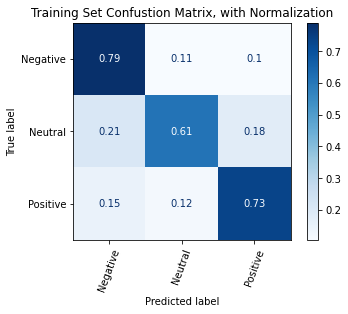

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.71      0.77      0.74      4470
     Neutral       0.68      0.60      0.63      3622
    Positive       0.71      0.72      0.72      4131

    accuracy                           0.70     12223
   macro avg       0.70      0.70      0.70     12223
weighted avg       0.70      0.70      0.70     12223



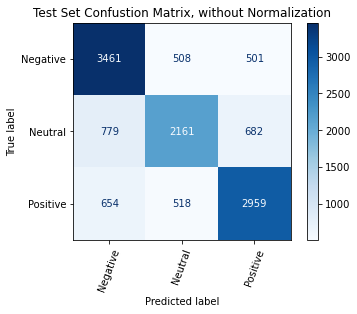

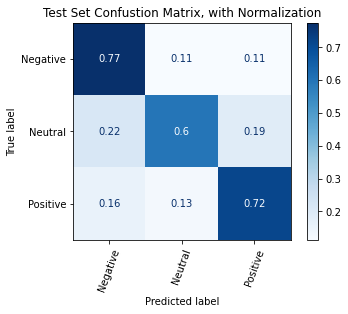

MINIMUM DOCUMENT FREQUENCY = 3

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75     17883
     Neutral       0.70      0.61      0.65     14486
    Positive       0.73      0.73      0.73     16523

    accuracy                           0.72     48892
   macro avg       0.72      0.71      0.71     48892
weighted avg       0.72      0.72      0.72     48892



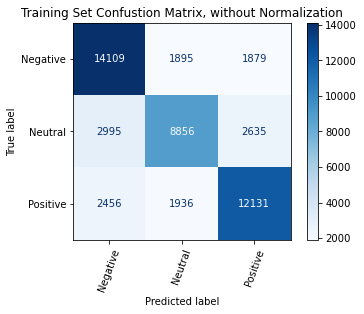

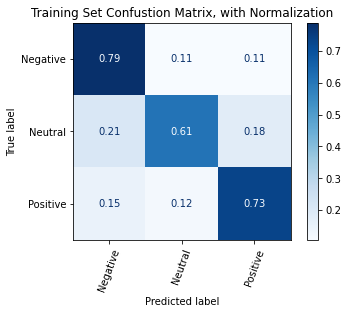

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.71      0.77      0.74      4470
     Neutral       0.68      0.60      0.64      3622
    Positive       0.71      0.72      0.71      4131

    accuracy                           0.70     12223
   macro avg       0.70      0.70      0.70     12223
weighted avg       0.70      0.70      0.70     12223



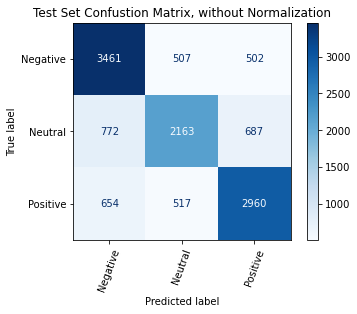

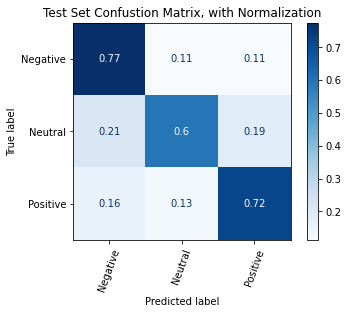

MINIMUM DOCUMENT FREQUENCY = 4

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75     17883
     Neutral       0.70      0.61      0.65     14486
    Positive       0.73      0.73      0.73     16523

    accuracy                           0.72     48892
   macro avg       0.71      0.71      0.71     48892
weighted avg       0.72      0.72      0.71     48892



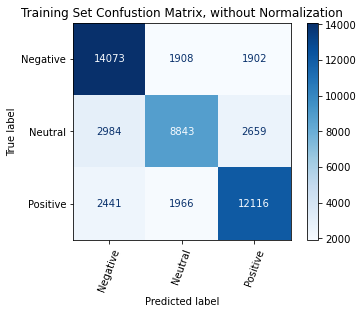

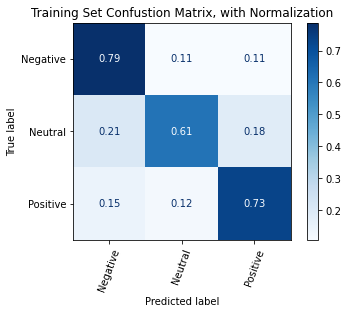

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.71      0.77      0.74      4470
     Neutral       0.67      0.59      0.63      3622
    Positive       0.71      0.71      0.71      4131

    accuracy                           0.70     12223
   macro avg       0.70      0.69      0.69     12223
weighted avg       0.70      0.70      0.70     12223



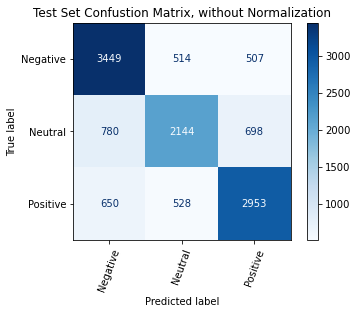

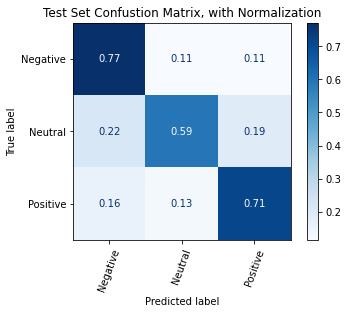

MINIMUM DOCUMENT FREQUENCY = 5

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.78      0.75     17883
     Neutral       0.69      0.61      0.64     14486
    Positive       0.72      0.73      0.73     16523

    accuracy                           0.71     48892
   macro avg       0.71      0.71      0.71     48892
weighted avg       0.71      0.71      0.71     48892



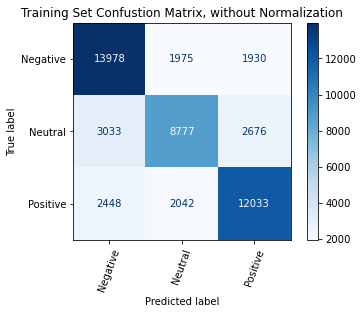

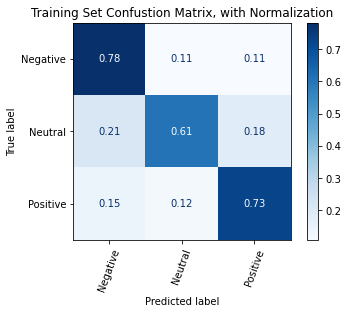

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.71      0.77      0.74      4470
     Neutral       0.67      0.59      0.62      3622
    Positive       0.71      0.71      0.71      4131

    accuracy                           0.70     12223
   macro avg       0.69      0.69      0.69     12223
weighted avg       0.69      0.70      0.69     12223



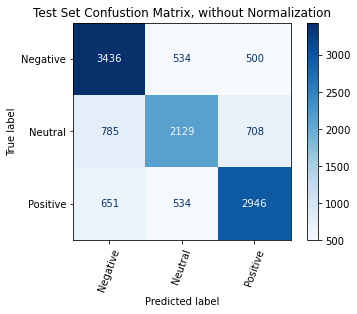

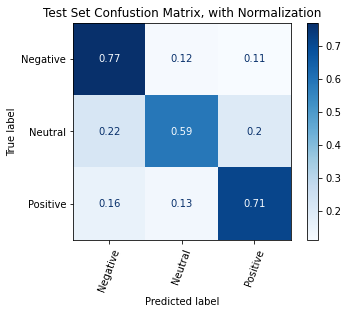

MINIMUM DOCUMENT FREQUENCY = 6

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.78      0.75     17883
     Neutral       0.68      0.60      0.64     14486
    Positive       0.72      0.73      0.72     16523

    accuracy                           0.71     48892
   macro avg       0.71      0.70      0.70     48892
weighted avg       0.71      0.71      0.71     48892



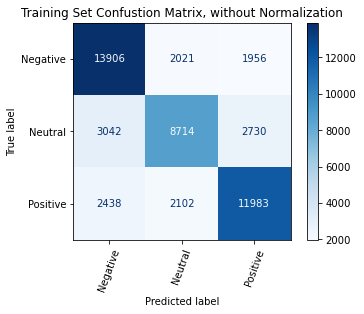

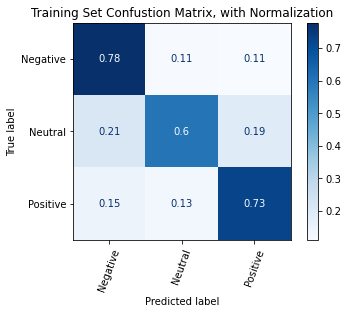

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73      4470
     Neutral       0.66      0.59      0.62      3622
    Positive       0.71      0.71      0.71      4131

    accuracy                           0.69     12223
   macro avg       0.69      0.69      0.69     12223
weighted avg       0.69      0.69      0.69     12223



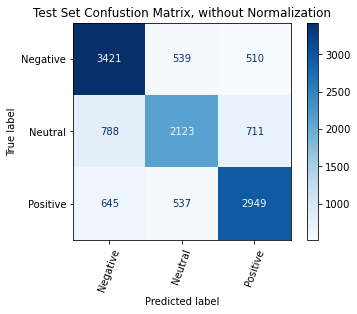

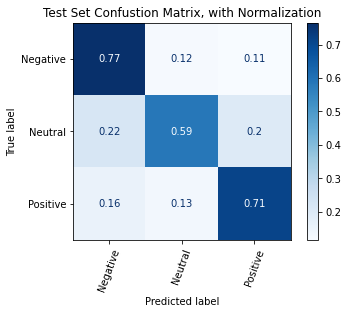

MINIMUM DOCUMENT FREQUENCY = 7

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.78      0.74     17883
     Neutral       0.67      0.60      0.63     14486
    Positive       0.72      0.72      0.72     16523

    accuracy                           0.70     48892
   macro avg       0.70      0.70      0.70     48892
weighted avg       0.70      0.70      0.70     48892



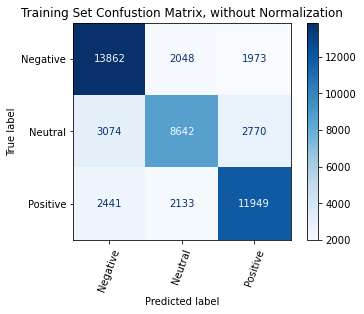

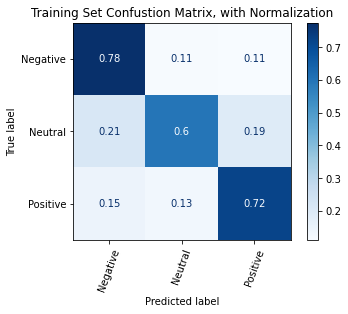

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.71      0.76      0.73      4470
     Neutral       0.66      0.59      0.62      3622
    Positive       0.71      0.71      0.71      4131

    accuracy                           0.69     12223
   macro avg       0.69      0.69      0.69     12223
weighted avg       0.69      0.69      0.69     12223



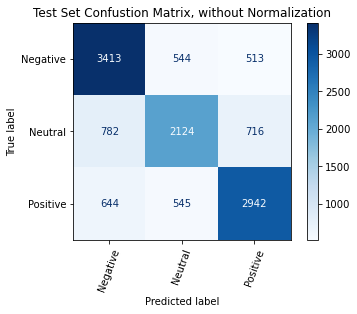

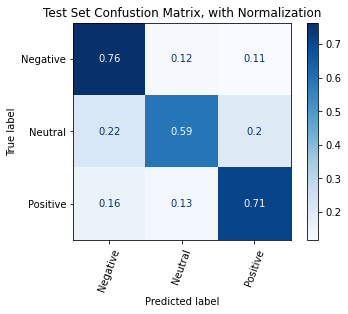

MINIMUM DOCUMENT FREQUENCY = 8

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.71      0.77      0.74     17883
     Neutral       0.67      0.60      0.63     14486
    Positive       0.72      0.72      0.72     16523

    accuracy                           0.70     48892
   macro avg       0.70      0.70      0.70     48892
weighted avg       0.70      0.70      0.70     48892



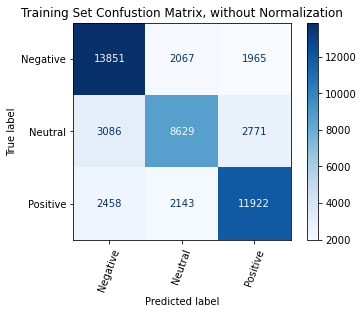

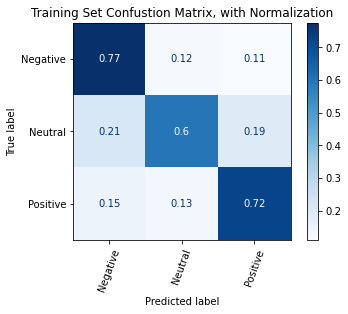

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73      4470
     Neutral       0.66      0.59      0.62      3622
    Positive       0.70      0.71      0.71      4131

    accuracy                           0.69     12223
   macro avg       0.69      0.69      0.69     12223
weighted avg       0.69      0.69      0.69     12223



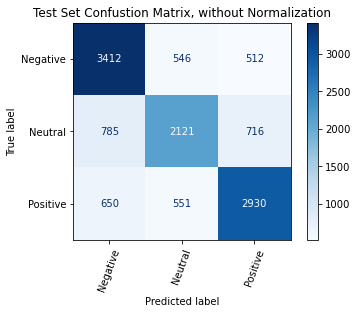

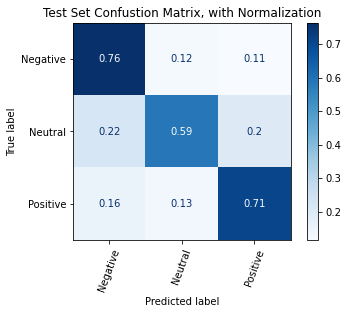

MINIMUM DOCUMENT FREQUENCY = 9

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.72      0.77      0.74     17883
     Neutral       0.67      0.60      0.63     14486
    Positive       0.71      0.72      0.72     16523

    accuracy                           0.70     48892
   macro avg       0.70      0.70      0.70     48892
weighted avg       0.70      0.70      0.70     48892



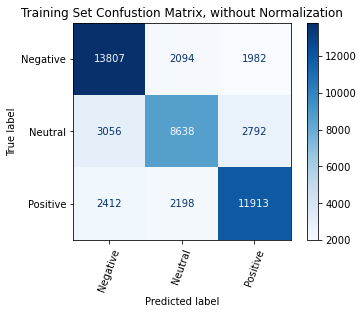

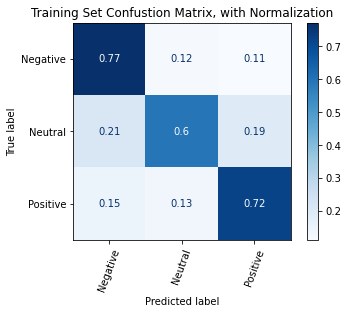

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.71      0.76      0.73      4470
     Neutral       0.66      0.59      0.62      3622
    Positive       0.71      0.71      0.71      4131

    accuracy                           0.69     12223
   macro avg       0.69      0.69      0.69     12223
weighted avg       0.69      0.69      0.69     12223



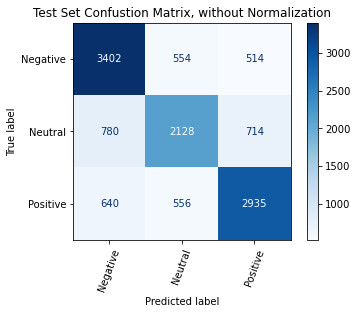

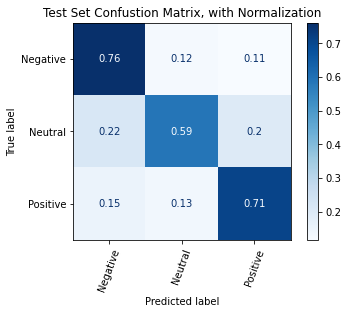

In [104]:
metrics_summary = []

for min_df in range(1,10):
    test_scores = train_and_eval_model(min_df)
    metrics_summary.append(test_scores)


In [105]:
metrics_summary_df = pd.DataFrame(metrics_summary, 
                                  columns=['min doc freq',
                                           'train accuracy',
                                           'test accuracy',
                                          'neg recall',
                                          'neutral recall',
                                          'pos recall'])

metrics_summary_df

,min doc freq,train accuracy,test accuracy,neg recall,neutral recall,pos recall
0,1.0,0.718563,0.701792,0.774720,0.594699,0.716776
1,2.0,0.718400,0.702037,0.774273,0.596632,0.716291
2,3.0,0.717827,0.702283,0.774273,0.597184,0.716534
3,4.0,0.716518,0.699174,0.771588,0.591938,0.714839
4,5.0,0.711527,0.696310,0.768680,0.587797,0.713145
5,6.0,0.707744,0.694838,0.765324,0.586140,0.713871
6,7.0,0.704676,0.693692,0.763535,0.586416,0.712176
7,8.0,0.703632,0.692383,0.763311,0.585588,0.709271
8,9.0,0.702733,0.692547,0.761074,0.587521,0.710482


# Analysis:
    
          -Recall +Recall MacroRecall Accuracy  Word     Min     tf/idf   SMOTE  Lemma
                                               Vector  Doc Freq
    NB      0.87    0.82     0.78       0.79              Y        Y       Y       Y
    NB      0.87    0.83     0.78       0.79      Y
    SVM     0.77    0.71     0.71       0.70              Y        Y       Y       Y
    SVM     0.84    0.74     0.68       0.70              Y        Y
   